In [2]:
import os
import pandas as pd
airbnb_data = pd.read_csv('./tomslee_airbnb_lisbon_1480_2017-07-27.csv')
# print(airbnb_data.head())

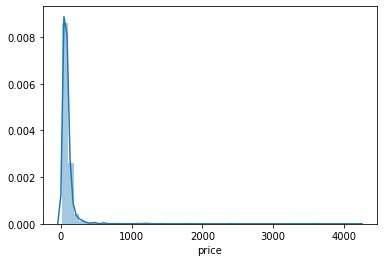

In [3]:
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

pd.plotting.register_matplotlib_converters() 
sns.distplot(a=airbnb_data['price'])

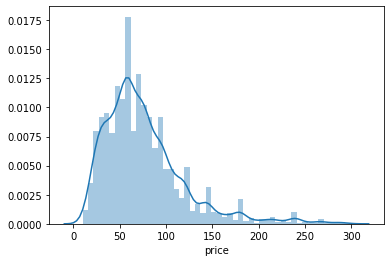

In [4]:
airbnb_sub_set = airbnb_data.loc[airbnb_data.price < 300] 
sns.distplot(a=airbnb_sub_set['price'])

In [5]:
lisbon_features = ['reviews', 'overall_satisfaction', 'accommodates', 'bedrooms', 'latitude', 'longitude']

Y = airbnb_data.price 
X = airbnb_data[lisbon_features]

/home/anuragkm/.local/lib/python3.6/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/anuragkm/.local/lib/python3.6/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/anuragkm/.local/lib/python3.6/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/anuragkm/.local/lib/python3.6/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/anuragkm/.local/lib/python3.6/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/anuragkm/.local/lib/python3.6/site-packages/seabo

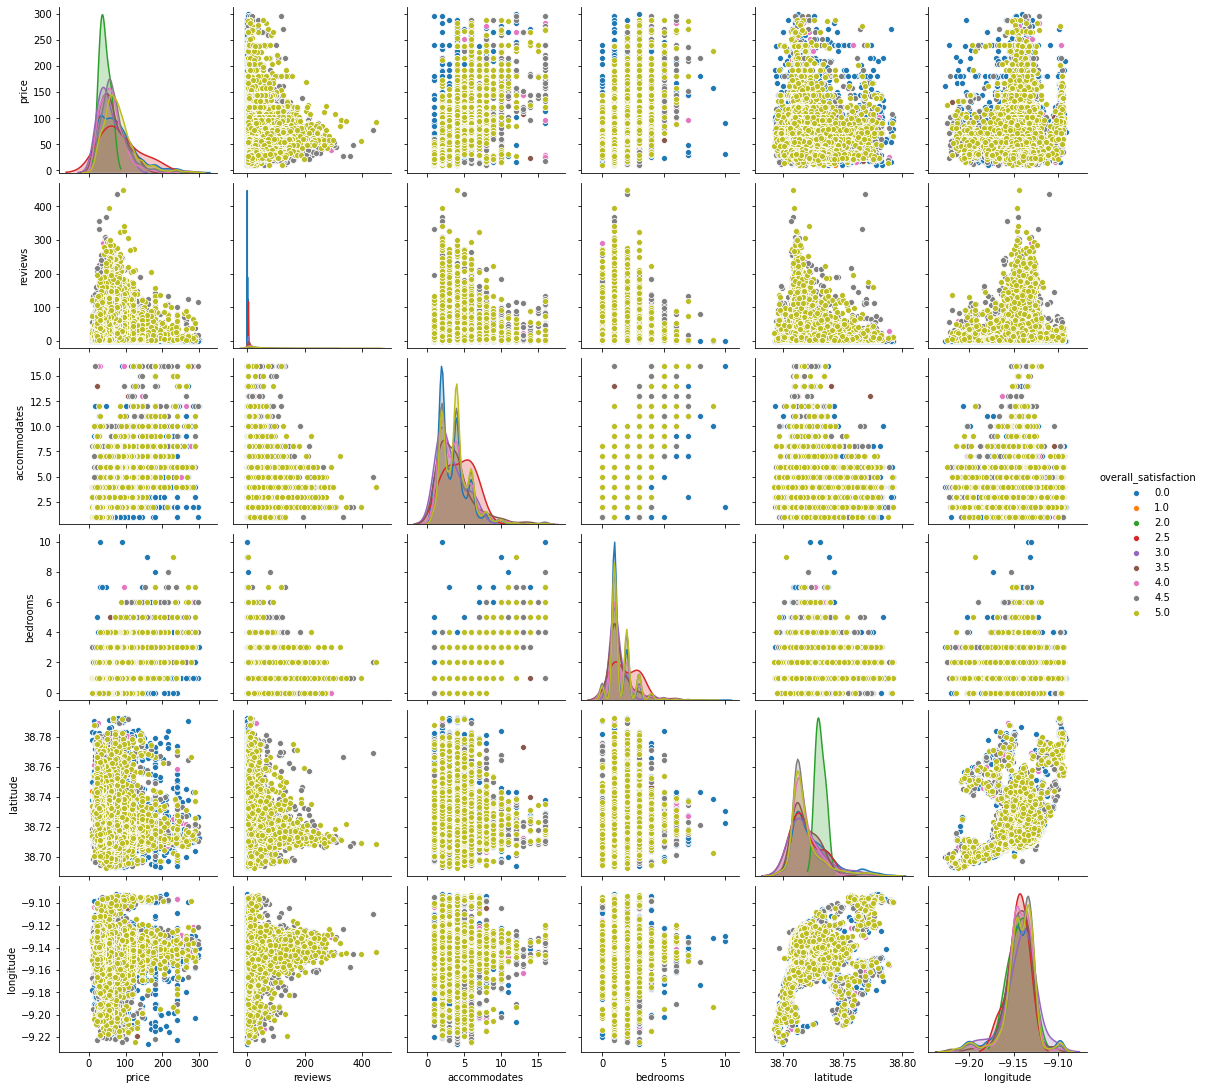

In [6]:
relevant_parameters = ['price'] + lisbon_features
sns.pairplot(airbnb_data.loc[airbnb_data.price < 300][relevant_parameters], hue="overall_satisfaction")

/home/anuragkm/.local/lib/python3.6/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/anuragkm/.local/lib/python3.6/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


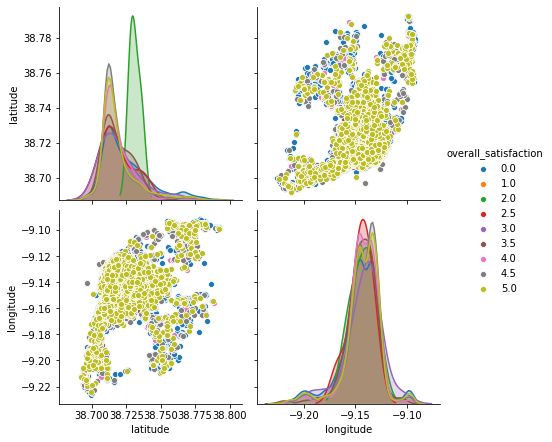

In [7]:
sns.pairplot(airbnb_data, vars=['latitude', 'longitude'], hue="overall_satisfaction", height=3)

In [8]:
from sklearn.model_selection import train_test_split
train_X, validation_X, train_Y, validation_Y = train_test_split(X, Y, random_state = 42)

print("Training set: Xt:{} Yt:{}".format(train_X.shape, train_Y.shape)) 
print("Validation set: Xv:{} Yv:{}".format(validation_X.shape, validation_Y.shape)) 
print("-") 
print("Full dataset: X:{} Y:{}".format(X.shape, Y.shape))

Training set: Xt:(10183, 6) Yt:(10183,)
Validation set: Xv:(3395, 6) Yv:(3395,)
-
Full dataset: X:(13578, 6) Y:(13578,)


In [9]:
from sklearn.tree import DecisionTreeRegressor

lisbon_airbnb_model = DecisionTreeRegressor(random_state = 42) 
lisbon_airbnb_model.fit(train_X, train_Y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [12]:
train_X.head()
lisbon_airbnb_model.predict(train_X.head())

array([  30.,   81.,   60.,   30.,  121.])

In [13]:
from sklearn.metrics import mean_absolute_error
 
validation_predictions = lisbon_airbnb_model.predict(validation_X)

validation_prediction_errors = mean_absolute_error(validation_Y, validation_predictions)

validation_prediction_errors

42.916642120765829

In [17]:
def compute_mae(train_X, train_Y, validation_X, validation_Y, max_leaf_nodes): 
  trees_model = DecisionTreeRegressor(max_leaf_nodes = max_leaf_nodes, random_state = 42) 
  trees_model.fit(train_X, train_Y) 
  validation_predictions = trees_model.predict(validation_X) 
  error = mean_absolute_error(validation_Y, validation_predictions)
  return(error)

def get_best_tree_size(train_X, train_Y, validation_X, validation_Y, verbose = False):
  candidate_max_leaf_nodes = [5, 10, 20, 30, 50, 100, 250, 500]
  minimum_error = None 
  best_tree_size = 5 
  for max_leaf_nodes in candidate_max_leaf_nodes: 
    current_error = compute_mae(train_X, train_Y, validation_X, validation_Y, max_leaf_nodes) 
    verbose and print("(Size: {}, MAE: {})".format(max_leaf_nodes, current_error)) 
    if(minimum_error == None or current_error < minimum_error): 
      minimum_error = current_error
      best_tree_size = max_leaf_nodes
  return(best_tree_size)
  
best_tree_size = get_best_tree_size(train_X, train_Y, validation_X, validation_Y, True) 
best_tree_size

(Size: 5, MAE: 42.6016036138866)
(Size: 10, MAE: 40.951013502542885)
(Size: 20, MAE: 40.00407688450048)
(Size: 30, MAE: 39.6249335490541)
(Size: 50, MAE: 39.038730827750555)
(Size: 100, MAE: 37.72578309289501)
(Size: 250, MAE: 36.82474862034445)
(Size: 500, MAE: 37.58889602439078)


250

In [18]:
lisbon_airbnb_model = DecisionTreeRegressor(max_leaf_nodes = best_tree_size, random_state = 42)
lisbon_airbnb_model.fit(train_X, train_Y)

# generate the predictions for the validation set
validation_predictions = lisbon_airbnb_model.predict(validation_X)
validation_prediction_errors = mean_absolute_error(validation_Y, validation_predictions)

validation_prediction_errors

36.824748620344451

In [23]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

# initialize with a list of values
encoder.fit(["shared room", "single room", "double room", "suite"])

sample_inputs = ["suite", "suite", "shared room", "double room", "single room"]

encoder.transform(sample_inputs)
encoder.classes_
lisbon_features_extended = ['room_type', 'neighborhood', 'reviews', 'overall_satisfaction', 'accommodates', 'bedrooms', 'latitude', 'longitude']
X = airbnb_data[lisbon_features_extended]

X.head()
categorical = (X.dtypes == 'object')
categorial_columns = list(categorical[categorical].index)

categorial_columns

['room_type', 'neighborhood']

In [25]:
train_X, validation_X, train_Y, validation_Y = train_test_split(X, Y, random_state = 42)

# create copies of our data sets to apply the transformations
train_X_encoded = train_X.copy()
validation_X_encoded = validation_X.copy()

encoder = LabelEncoder()

# for each column we fit the encoder and transform each of the rows
for column in categorial_columns:
    train_X_encoded[column] = encoder.fit_transform(train_X[column])
    validation_X_encoded[column] = encoder.transform(validation_X[column])

# a sample of our transformed data
train_X_encoded.head()

,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,latitude,longitude
11956,1,9,29,4.5,2,1.0,38.717426,-9.156587
5665,0,21,75,5.0,5,2.0,38.716165,-9.144141
11639,1,15,2,0.0,3,1.0,38.709567,-9.143207
13391,1,4,4,5.0,2,1.0,38.727817,-9.133753
3219,0,18,1,0.0,6,3.0,38.723333,-9.130640


In [26]:
best_tree_size = get_best_tree_size(train_X_encoded, train_Y, validation_X_encoded, validation_Y)

# create the model
lisbon_airbnb_model = DecisionTreeRegressor(max_leaf_nodes = best_tree_size, random_state = 42)
lisbon_airbnb_model.fit(train_X_encoded, train_Y)

# generate the predictions for the validation set
validation_predictions = lisbon_airbnb_model.predict(validation_X_encoded)
validation_prediction_errors = mean_absolute_error(validation_Y, validation_predictions)

validation_prediction_errors

35.690195084932355

In [31]:
from sklearn.preprocessing import OneHotEncoder
room_type = ["shared room", "single room", "double room", "suite"]
building_type = ["hotel", "apartement", "iglo"]
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
train_X_encoded_categories = pd.DataFrame(encoder.fit_transform(train_X[categorial_columns]))
validation_X_encoded_categories = pd.DataFrame(encoder.transform(validation_X[categorial_columns]))
train_X_encoded_categories.index = train_X.index
validation_X_encoded_categories.index = validation_X.index

partial_train_X = train_X.drop(categorial_columns, axis=1)
partial_validation_X = validation_X.drop(categorial_columns, axis=1)

train_X_encoded = pd.concat([partial_train_X, train_X_encoded_categories], axis=1)
validation_X_encoded = pd.concat([partial_validation_X, validation_X_encoded_categories], axis=1)


validation_X_encoded.head()

,reviews,overall_satisfaction,accommodates,bedrooms,latitude,longitude,0,1,2,3,...,17,18,19,20,21,22,23,24,25,26
1061,57,5.0,4,2.0,38.717151,-9.145846,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6480,80,5.0,4,0.0,38.711204,-9.134876,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
12233,14,5.0,2,1.0,38.727864,-9.142812,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4659,19,5.0,4,1.0,38.718072,-9.125642,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7383,3,4.0,4,1.0,38.712991,-9.141062,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [32]:
best_tree_size = get_best_tree_size(train_X_encoded, train_Y, validation_X_encoded, validation_Y)

# create the model
lisbon_airbnb_model = DecisionTreeRegressor(max_leaf_nodes = best_tree_size, random_state = 42)
lisbon_airbnb_model.fit(train_X_encoded, train_Y)

# generate the predictions for the validation set
validation_predictions = lisbon_airbnb_model.predict(validation_X_encoded)
validation_prediction_errors = mean_absolute_error(validation_Y, validation_predictions)

validation_prediction_errors

36.970109303678171

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# create copies of our data sets to apply the transformations
train_X_encoded = train_X.copy()
validation_X_encoded = validation_X.copy()

# use the label encoder to our categorical data
encoder = LabelEncoder()

# for each column we fit the encoder and transform each of the rows
for column in categorial_columns:
    train_X_encoded[column] = encoder.fit_transform(train_X[column])
    validation_X_encoded[column] = encoder.transform(validation_X[column])

# let us set a maximum of 250 trees in our forest
airbnb_lisbon_forest_model = RandomForestRegressor(n_estimators = 250, random_state = 42)
airbnb_lisbon_forest_model.fit(train_X_encoded, train_Y)

predictions = airbnb_lisbon_forest_model.predict(validation_X_encoded)

mean_absolute_error(validation_Y, predictions)

33.999650073637703